In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/Users/pranaymishra/Desktop/sih1429/ommas_main/static/data/monitor/sqm_monitors_jh.csv")




In [12]:
data

,MONITOR_NAME,ADMIN_IM_YEAR,ADMIN_IM_MONTH1,STATE_NAME,DISTRICT_NAME,COMP_S,COMP_SRI,COMP_U,C_GRADE_COUNT_T,ONGOING_S,...,ONGOING_U,P_GRADE_COUNT_T,MAINT_S,MAINT_SRI,MAINT_U,M_GRADE_COUNT_T,LSB_S,LSB_SRI,LSB_U,L_GRADE_COUNT_T
0,Aftab Alam,2023,January,Jharkhand,Dhanbad,0,0,0,0,11,...,0,11,0,0,0,0,0,0,0,0
1,Aftab Alam,2023,March,Jharkhand,Simdega,2,0,0,2,1,...,0,1,6,0,0,6,2,0,0,2
2,Aftab Alam,2023,May,Jharkhand,Simdega,0,0,0,0,0,...,0,0,5,0,0,5,0,0,0,0
3,Aftab Alam,2023,June,Jharkhand,Sahibganj,0,0,0,0,4,...,0,4,0,0,0,0,0,0,0,0
4,Aftab Alam,2023,October,Jharkhand,Dumka,5,0,0,5,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yogendra Kumar Pandit,2023,August,Jharkhand,Chatra,2,0,0,2,6,...,0,6,5,0,0,5,1,0,0,1
201,Yogendra Kumar Pandit,2023,August,Jharkhand,Koderma,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,0
202,Yogendra Kumar Pandit,2023,September,Jharkhand,Hazaribagh,1,0,0,1,3,...,0,3,0,0,0,0,0,0,0,0
203,Yogendra Kumar Pandit,2023,October,Jharkhand,Deoghar,0,0,0,0,0,...,0,0,3,0,0,3,7,0,0,7


Accuracy: 0.4634146341463415


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (17,) and arg 3 with shape (24,).

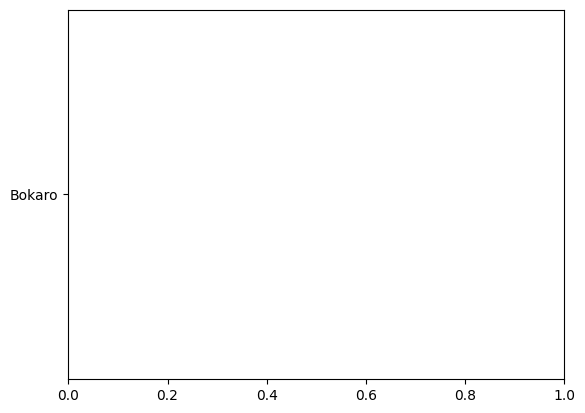

In [14]:

features = data.drop(['MONITOR_NAME', 'ADMIN_IM_YEAR', 'ADMIN_IM_MONTH1', 'STATE_NAME'], axis=1)

# Label Encoding
label_encoder = LabelEncoder()
features['DISTRICT_LABEL'] = label_encoder.fit_transform(features['DISTRICT_NAME'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features.drop(['DISTRICT_NAME'], axis=1), features['DISTRICT_LABEL'], test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the results
# Visualize the results
district_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
top_features = model.feature_importances_[:len(district_names)]

plt.barh(district_names, top_features)
plt.xlabel('Feature Importance')
plt.title('Top Features for District Prediction')
plt.show()




In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'district_names' is a list or array containing district names
district_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Get feature importances and create a DataFrame
feature_importance_df = pd.DataFrame({'District': district_names, 'Importance': model.feature_importances_})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for the top N features (adjust N as needed)
top_n = 10
plt.barh(feature_importance_df['District'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features for District Prediction')
plt.show()


ValueError: All arrays must be of the same length

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'district_names' is a list or array containing district names
district_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Get feature importances and create a DataFrame
feature_importance_df = pd.DataFrame({'District': district_names, 'Importance': model.feature_importances_})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for all features
plt.barh(feature_importance_df['District'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Features Importance for District Prediction')
plt.show()


ValueError: All arrays must be of the same length